In [8]:
from pathlib import Path
import os

import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import random

from bearfacedetection.xml_parser import load_xml

from ultralytics import YOLO

In [2]:
def filepath_to_image(filepath: Path):
    image = cv2.imread(str(filepath))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def to_boolean_mask(black_white_image):
    return np.all(black_white_image == [255, 255, 255], axis=2)

def load_image(image_data: dict):
    image_filepath = image_data["filepath"]
    image = cv2.imread(str(image_filepath))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def show_image(image):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.axis('on')
    plt.show()

In [3]:
base_path = Path('../../data/01_raw/BearID/')
label_path = base_path / 'images_train_without_bc.xml'
xml_data = load_xml(base_path=base_path, filepath=label_path)

In [4]:
xml_data["images"][0]

{'filepath': PosixPath('../../data/01_raw/BearID/images/brooksFalls/je_201708/bf_755/755-scare-d-bear-near-the-north-side-of-brooks-falls_9237775339_o.jpg'),
 'bboxes': [{'top': 1059,
   'left': 1172,
   'width': 200,
   'height': 200,
   'parts': {'htop': {'x': 1283, 'y': 1068},
    'lear': {'x': 1335, 'y': 1080},
    'rear': {'x': 1228, 'y': 1084},
    'nose': {'x': 1279, 'y': 1197},
    'leye': {'x': 1324, 'y': 1132},
    'reye': {'x': 1246, 'y': 1133}}}],
 'size': {'width': 2000, 'height': 1500}}

In [5]:
idx = 46
image_data = xml_data["images"][idx]
image_filepath = image_data["filepath"]
image = load_image(image_data)

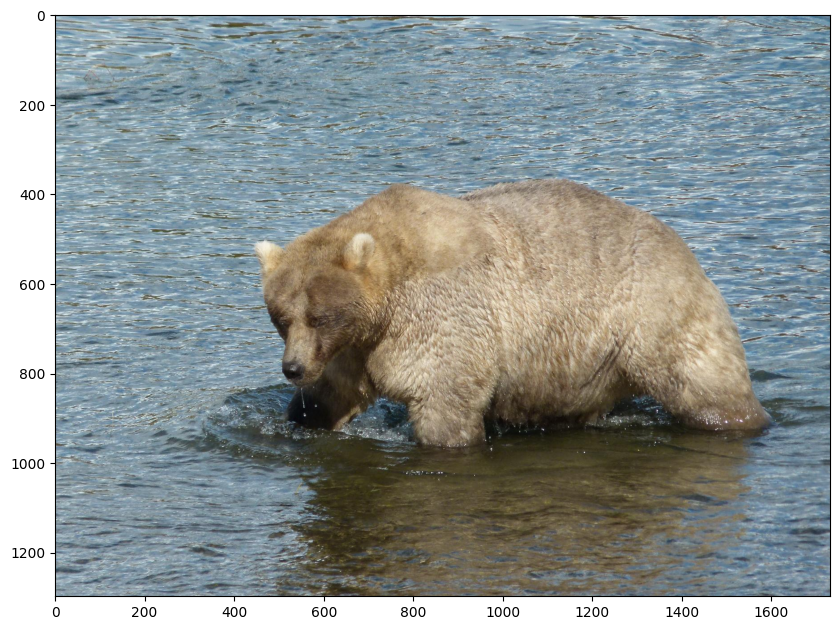

In [6]:
show_image(image)

In [7]:
image_data

{'filepath': PosixPath('../../data/01_raw/BearID/images/brooksFalls/bear_mon_201609/bf_435/P1260720.JPG'),
 'bboxes': [{'top': 614,
   'left': 459,
   'width': 204,
   'height': 200,
   'parts': {'htop': {'x': 558, 'y': 564},
    'lear': {'x': 638, 'y': 583},
    'rear': {'x': 488, 'y': 579},
    'nose': {'x': 520, 'y': 798},
    'leye': {'x': 584, 'y': 688},
    'reye': {'x': 508, 'y': 690}}}],
 'size': {'width': 1731, 'height': 1298}}

In [19]:
model = YOLO('yolov8n-pose.pt')  # load an official model


image 1/1 /home/chouffe/fruitpunch/challenges/bear/notebooks/bearfacelandmarkdetection/../../data/01_raw/BearID/images/brooksFalls/bear_mon_201609/bf_435/P1260720.JPG: 480x640 (no detections), 64.9ms
Speed: 3.0ms preprocess, 64.9ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


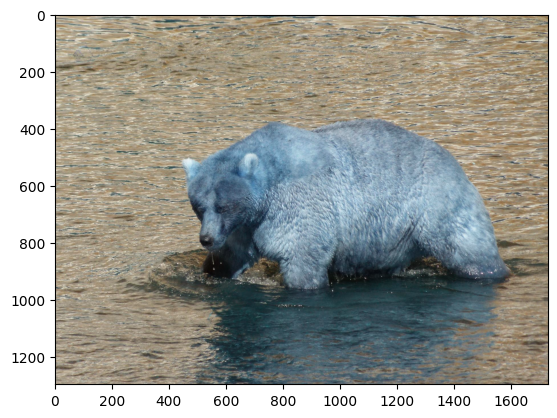

In [25]:
results = model.predict(image_data["filepath"])
plt.imshow(results[0].plot())

Vanilla YOLOv8 pose does not work with bears.


Found https://images.all-free-download.com/images/graphicwebp/making_faces_198343.webp locally at making_faces_198343.webp
image 1/1 /home/chouffe/fruitpunch/challenges/bear/notebooks/bearfacelandmarkdetection/making_faces_198343.webp: 640x480 1 person, 101.8ms
Speed: 3.3ms preprocess, 101.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


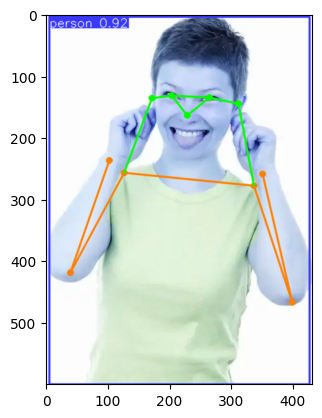

In [24]:
url = "https://images.all-free-download.com/images/graphicwebp/making_faces_198343.webp"
results = model.predict(url)
plt.imshow(results[0].plot())

Vanilla YOLOv8 pose does work really well with humans.